In [1]:
# --- Load Agents --- #
from agents.agent_ddpg.agent import DDPG_Agent

# --- Load Environments --- #
from environment.environment_loader import environment_loader

# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten


# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2


# Experiments with config files

In [2]:
from experiments.experiment_list import exp_config_ddpg
from agents.agent_ddpg.config import DDPG_AgentConfig


In [3]:
ddpg_experiments = []

# --- Env --- #
env, state_size, action_size, brain_name, num_agents = environment_loader (name="environment/Tennis.exe", no_graphics = True)

for i, config in enumerate(exp_config_ddpg):
    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of ddpg: state_size, action_size, seed=1, config=DDPG_AgentConfig()
    """

    # --- Agents --- #
    agent_config = DDPG_AgentConfig(ACTOR_H=config[0], CRITIC_H=config[0], LR_ACTOR=config[1], LR_CRITIC=config[1], OUTPUT_TYPE='vectors')
    agent = DDPG_Agent(state_size, action_size, seed=1, config=agent_config)
    agents = [agent for _ in range(num_agents)]

    # --- Experiment --- #
    num_episodes = 3000
    max_t = 1000
    new_experiment = Experiment(name="DDPG Exp_{}".format(str(i+23)), environment= env, agents=agents, brain_name = brain_name, max_t=max_t,num_episodes=num_episodes, goal = 0.5, save_states_every=0, experiment_num=i+23)
    ddpg_experiments.append(new_experiment)

print(len(ddpg_experiments))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
INFO:1e5352fd-c85c-49

 Total score (max over agents) 2999 episode: 2.600000038743019 | 	Avarage in last 100 is 1.1119000166095794Scores saved!
[array([2.60000004]), array([0.80000001]), array([1.10000002]), array([2.60000004]), array([2.60000004])]


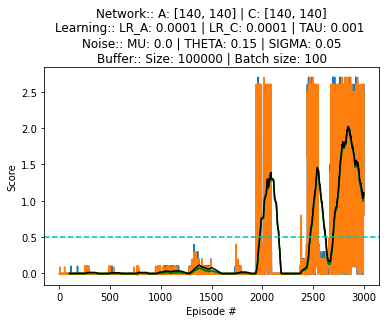

In [4]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False, scores_window=100)

In [3]:
# experiment.goal=0.5
# experiment.save(score_history, state_history, display = False, scores_window=100)


NameError: name 'ddpg_experiments' is not defined

# On one experiment

In [ ]:

env = GridEnv(num_agent = 2, grid_size = 5, agents_start = [(1,1),(2,3)], goals_start=[(1,3),(3,2)], prob_right_direction = 1, render_board = False)
agents = [DDPG_Agent(env.state_space, env.action_space.n, seed=1) for _ in range(env.num_agent)]
experiments = [Experiment(name="DDPG Exp {}".format(1), environment= env, agents=agents, max_t=30, num_episodes=1, goal = 0., save_states_every=10)]

In [ ]:
for experiment in experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history)